In [20]:
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# generating 2d linearly seperable data
def generate_data():
    np.random.seed(42)
    class1 = np.random.randn(50, 2) + [2, 2]
    class2 = np.random.randn(50, 2) + [-2, -2]
    X = np.vstack((class1, class2))
    y = np.array([1]*50 + [-1]*50)
    return X, y

X, y = generate_data()



In [22]:
# Linear SVM
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = y  # y must be in {-1, 1}
        self.w = np.zeros(n_features)
        self.b = 0

        for epoch in range(self.n_iters):
            for idx, xi in enumerate(X):
                condition = y_[idx] * (np.dot(xi, self.w) - self.b) >= 1
                if condition:
                    dw = self.lambda_param * self.w
                    self.w -= self.lr * dw
                else:
                    dw = self.lambda_param * self.w - np.dot(xi, y_[idx])
                    db = y_[idx]
                    self.w -= self.lr * dw
                    self.b -= self.lr * db

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
        

In [23]:
## training SVM
svm = SVM()
svm.fit(X, y)
predictions = svm.predict(X)


# accuracy
accuracy = np.mean(predictions == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


Training Accuracy: 100.00%


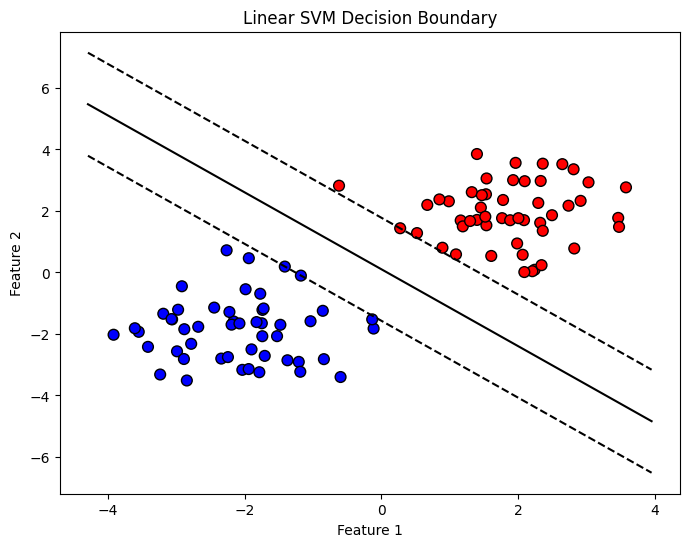

In [24]:
# plot decision boudary
def plot_svm(X, y, svm):
    def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]


    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=60, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    x = np.linspace(xlim[0], xlim[1], 100)

    w = svm.w
    b = svm.b
    y_decision = get_hyperplane(x, w, b, 0)
    y_margin_pos = get_hyperplane(x, w, b, 1)
    y_margin_neg = get_hyperplane(x, w, b, -1)

    plt.plot(x, y_decision, 'k-')
    plt.plot(x, y_margin_pos, 'k--')
    plt.plot(x, y_margin_neg, 'k--')
    plt.title("Linear SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_svm(X, y, svm)